<a href="https://colab.research.google.com/github/safacharfi/Network-Security-Covering-both-anomaly-and-intrusion-detection-systems/blob/main/Week31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**






In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


**Load the Dataset**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load datasets from Google Drive
testing_set = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')
training_set = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')
LIST_EVENTS = pd.read_csv('/content/drive/MyDrive/UNSW-NB15_LIST_EVENTS.csv')
NB15_1 = pd.read_csv('/content/drive/MyDrive/UNSW-NB15_1.csv')
NB15_2 = pd.read_csv('/content/drive/MyDrive/UNSW-NB15_2.csv')
NB15_3 = pd.read_csv('/content/drive/MyDrive/UNSW-NB15_3.csv')
NB15_4 = pd.read_csv('/content/drive/MyDrive/UNSW-NB15_4.csv')
NB15_features = pd.read_csv('/content/drive/MyDrive/NUSW-NB15_features.csv', encoding='cp1252')


<ipython-input-3-0a5d08e3661d>:7: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_1 = pd.read_csv('/content/drive/MyDrive/UNSW-NB15_1.csv')
<ipython-input-3-0a5d08e3661d>:8: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_2 = pd.read_csv('/content/drive/MyDrive/UNSW-NB15_2.csv')


**Check the structure and contents of the datasets**

In [4]:
# Display basic info about the datasets
print("Training Data Info:")
print(training_set.info())

print("\nTesting Data Info:")
print(testing_set.info())

# Optionally, display the first few rows
print("\nFirst few rows of training data:")
display(training_set.head())

print("\nFirst few rows of testing data:")
display(testing_set.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-n

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0



First few rows of testing data:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


Understanding of the features

In [ ]:
NB15_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


Concatenation of the Data

In [5]:
NB15_1.columns = NB15_features['Name']
NB15_2.columns = NB15_features['Name']
NB15_3.columns = NB15_features['Name']
NB15_4.columns = NB15_features['Name']

In [6]:
training_set = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)

In [7]:
# Shuffle the data points in train_df
training_set = training_set.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
training_set.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,...,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,...,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,...,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,...,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,...,,2,2,5,4,1,1,1,NaN,0


Dimension of Dataset

In [8]:
# Print dimensions of the datasets
print("Training Data Dimensions (rows, columns):", training_set.shape)
print("Testing Data Dimensions (rows, columns):", testing_set.shape)

Training Data Dimensions (rows, columns): (2540043, 49)
Testing Data Dimensions (rows, columns): (82332, 45)


In [9]:
# Identify the data types of columns
column_data_types = training_set.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 40 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


Chcking if there is duplicate records

In [10]:
print("Duplicates in train_df: ",training_set.duplicated().sum())

Duplicates in train_df:  480626


Dropping the duplicates

In [12]:
train_df=training_set

In [13]:
train_df = train_df.drop_duplicates()

1.Check for missing data

In [14]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Name,,
srcip,0,0.00
sport,0,0.00
dstip,0,0.00
dsport,0,0.00
proto,0,0.00
state,0,0.00
dur,0,0.00
sbytes,0,0.00
dbytes,0,0.00


Handling the null Values

In [15]:
# NaN values implies that no attack are there for that particular row data, Replace NaN values in the 'attack_cat' column with 'not attacked'
train_df['attack_cat'].fillna('normal',inplace = True)
train_df['attack_cat'] = train_df['attack_cat'].apply(lambda x: x.strip().lower())

# missing values imply that there were no flows with HTTP methods in certain instances so we will replace the NAN with 0
train_df['ct_flw_http_mthd'].fillna(0, inplace=True)

# is_ftp_login is of type binary that mean it takes 1(user has loged in) or 0 (or not) so the best approch is to replace nan with 0
train_df['is_ftp_login'].fillna(0, inplace=True)

<ipython-input-15-dd0b0bbe2a5d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['attack_cat'].fillna('normal',inplace = True)
<ipython-input-15-dd0b0bbe2a5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['attack_cat'].fillna('normal',inplace = True)
<ipython-input-15-dd0b0bbe2a5d>:3: SettingWithCopyWarning: 
A value is tr

In [16]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Name,,
srcip,0,0.0
sport,0,0.0
dstip,0,0.0
dsport,0,0.0
proto,0,0.0
state,0,0.0
dur,0,0.0
sbytes,0,0.0
dbytes,0,0.0


Handling the ct_ftp_cmd

In [17]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('str')

<ipython-input-17-111c5e1f747c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('str')


In [18]:
train_df['ct_ftp_cmd'].dtype

dtype('O')

In [19]:
train_df['ct_ftp_cmd'].unique()

array([' ', '0', '1', '2', '4', '5', '3', '6', '8'], dtype=object)

In [20]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].replace(' ', '0')

<ipython-input-20-7defc3ac38b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].replace(' ', '0')


In [21]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('int')

<ipython-input-21-413502d80129>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('int')


In [22]:
train_df['ct_ftp_cmd'].dtype

dtype('int64')

In [23]:
train_df['ct_ftp_cmd'].unique()

array([0, 1, 2, 4, 5, 3, 6, 8])

Handling the ftp_login

In [24]:
def convert_to_binary(df, column):
    df[column] = (df[column] > 0).astype(int)
    return df
column = 'is_ftp_login'
convert_to_binary(train_df, column)

<ipython-input-24-d4a3cd1aff18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column] > 0).astype(int)


Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,...,0,10,8,4,5,3,1,7,normal,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,...,0,14,6,8,12,5,1,6,normal,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,...,0,9,16,7,6,1,1,3,normal,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,...,0,33,33,17,17,17,17,33,generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,...,0,2,2,5,4,1,1,1,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,59.166.0.2,29290,149.171.126.9,143,tcp,FIN,0.031870,7820,15060,31,...,0,5,6,1,4,1,1,1,normal,0
2540037,59.166.0.0,18378,149.171.126.0,17406,udp,CON,0.035147,528,304,31,...,0,11,4,3,7,1,1,1,normal,0
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,...,0,3,10,4,1,1,1,1,normal,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,...,0,1,1,2,6,1,1,1,normal,0


In [25]:
#Converting in string first to ensure consistency
train_df['sport'] = train_df['sport'].astype('str')

<ipython-input-25-1d820bcfc4dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['sport'] = train_df['sport'].astype('str')


In [26]:
# Handling non-integer values or NaNs
train_df['sport'] = pd.to_numeric(train_df['sport'], errors='coerce').fillna(0).astype(int)

<ipython-input-26-eb1ed04116b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['sport'] = pd.to_numeric(train_df['sport'], errors='coerce').fillna(0).astype(int)


In [27]:
#Converting in string first to ensure consistency
train_df['dsport'] = train_df['dsport'].astype('str')

<ipython-input-27-9c1b6a49520c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['dsport'] = train_df['dsport'].astype('str')


In [28]:
# Handling non-integer values or NaNs
train_df['dsport'] = pd.to_numeric(train_df['dsport'], errors='coerce').fillna(0).astype(int)

<ipython-input-28-58661ad70a8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['dsport'] = pd.to_numeric(train_df['dsport'], errors='coerce').fillna(0).astype(int)


3.Detect Outliers:

We can look at the statistical summary of the data, and for each numerical column, we can check for unusually high or low values by identifying those beyond a certain range

In [29]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

43

In [ ]:
# Display the "Label" column from the training set
print("Training Set 'Label' Column:")
print(training_set['Label'].head(10))  # Display the first 10 values

Training Set 'Label' Column:
0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
8    0
9    1
Name: Label, dtype: int64


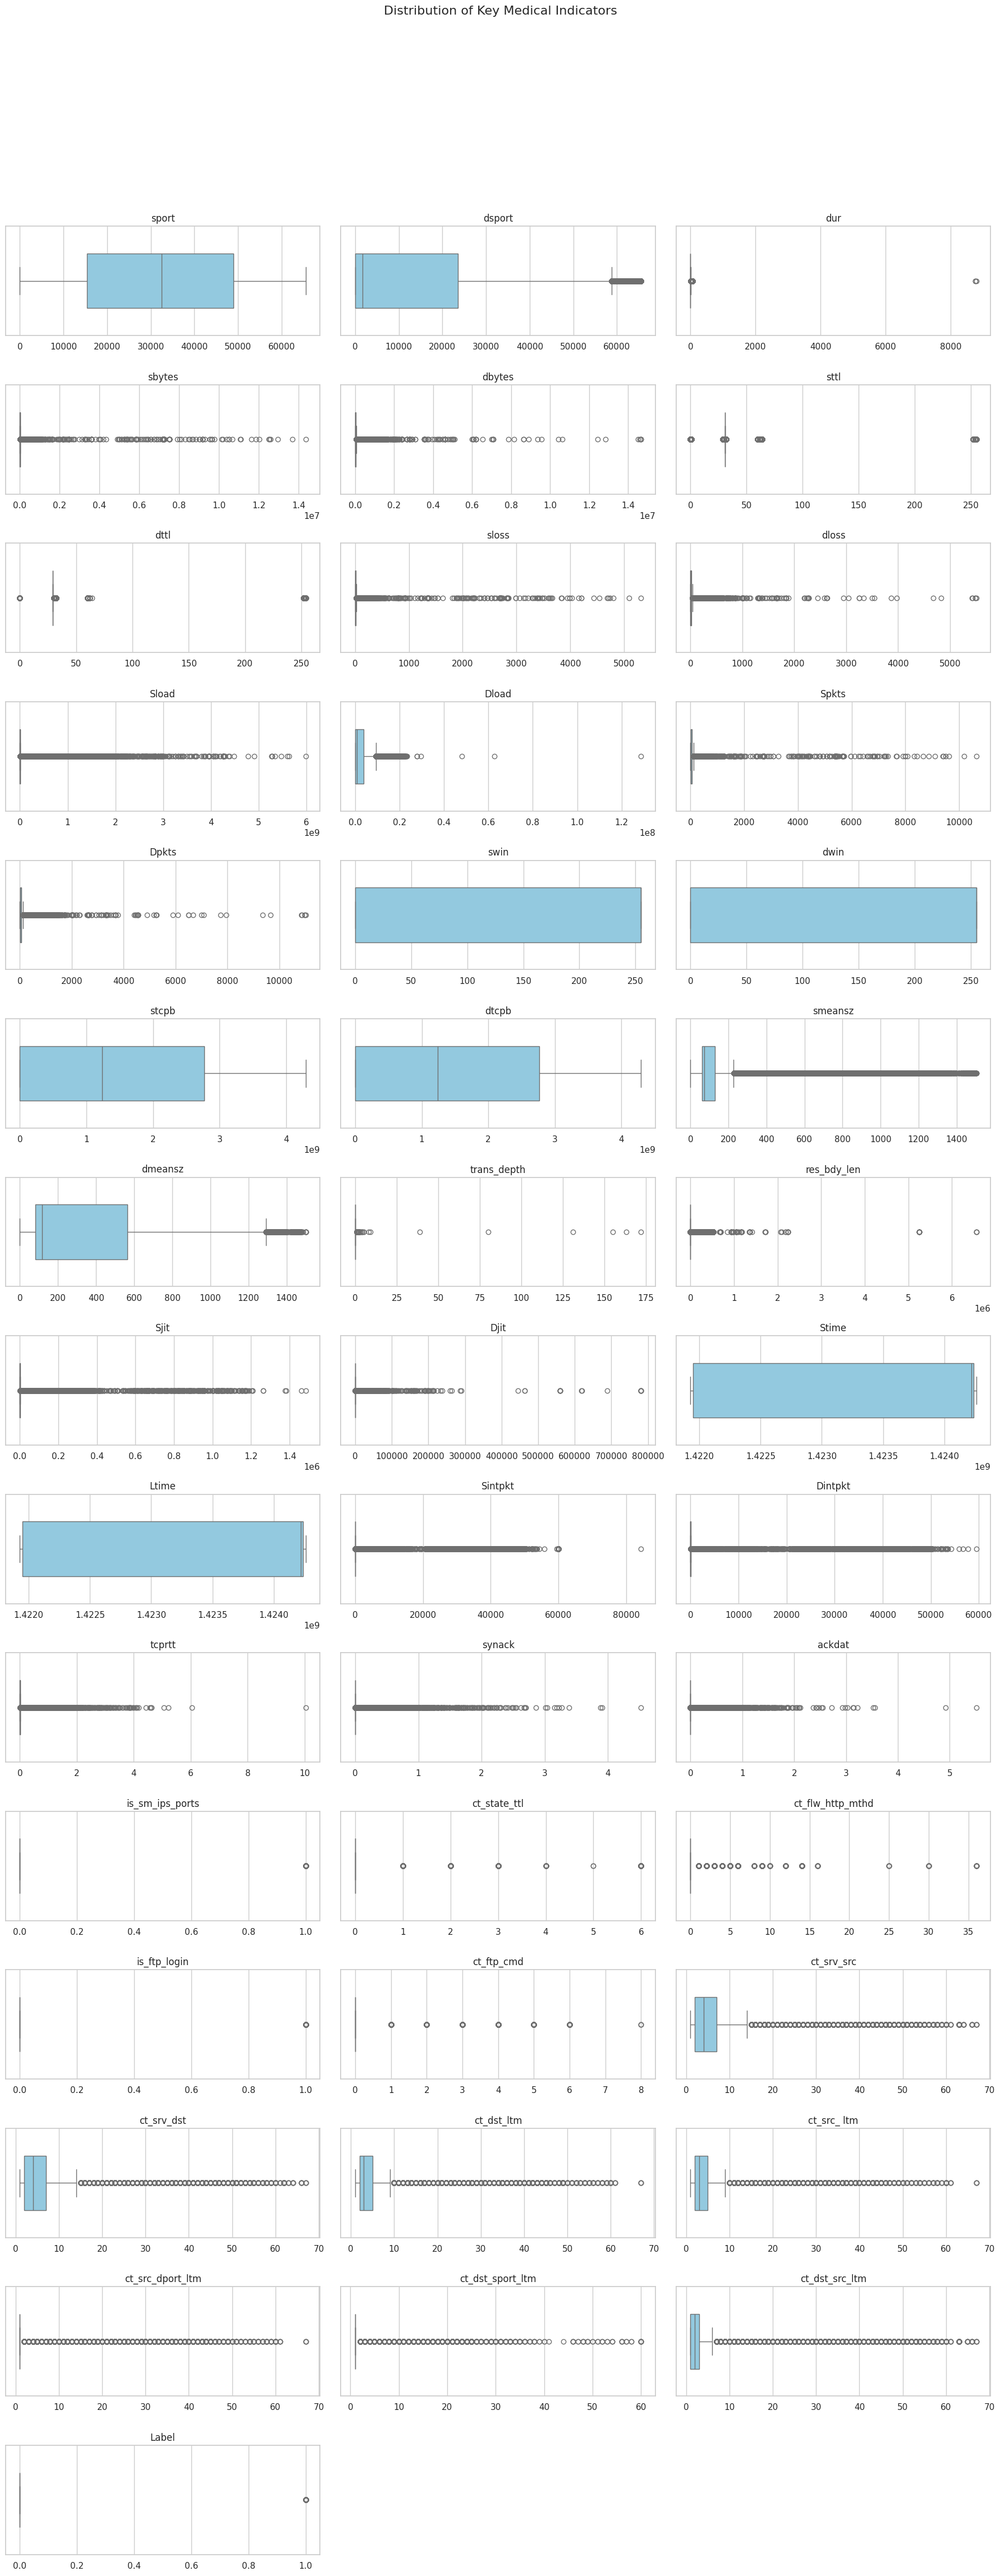

In [30]:
import math

# Number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue', width=0.5)
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [31]:
# Extract numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Columns to exclude
exclude_columns = ['sport', 'swim', 'dwim', 'stcpb', 'dtcpb', 'Stime', 'Ltime']

# Filter out the columns to exclude
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

In [32]:
for col in numerical_columns:
    median_value = train_df[col].median()
    lower_bound = train_df[col].quantile(0.25) - 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    upper_bound = train_df[col].quantile(0.75) + 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

<ipython-input-32-671e0a3a800c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
<ipython-input-32-671e0a3a800c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
<ipython-input-32-671e0a3a800c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Features engineering

In [33]:
def generate_features(df):
    # Duration
    df['duration'] = df['Ltime'] - df['Stime']

    # Ratios
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['Spkts'] / (df['Dpkts'] + 1)
    df['load_ratio'] = df['Sload'] / (df['Dload'] + 1)
    df['jit_ratio'] = df['Sjit'] / (df['Djit'] + 1)
    df['inter_pkt_ratio'] = df['Sintpkt'] / (df['Dintpkt'] + 1)
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)

    # Aggregate Features
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['Spkts'] + df['Dpkts']
    df['total_load'] = df['Sload'] + df['Dload']
    df['total_jitter'] = df['Sjit'] + df['Djit']
    df['total_inter_pkt'] = df['Sintpkt'] + df['Dintpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']

    # Interaction Features
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['Spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['Dpkts']
    df['load_jit_interaction_src'] = df['Sload'] * df['Sjit']
    df['load_jit_interaction_dst'] = df['Dload'] * df['Djit']
    df['pkt_jit_interaction_src'] = df['Spkts'] * df['Sjit']
    df['pkt_jit_interaction_dst'] = df['Dpkts'] * df['Djit']

    # Statistical Features
    df['mean_pkt_size'] = df['smeansz'] + df['dmeansz']
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']

    return df

In [34]:
generate_features(train_df)

<ipython-input-33-28a8059705b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['Ltime'] - df['Stime']
<ipython-input-33-28a8059705b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
<ipython-input-33-28a8059705b4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
0,175.45.176.3,57672,149.171.126.15,3260.0,tcp,CON,0.285356,986.0,86.0,31.0,...,0.756333,0.001285,5916.0,172.0,7.237792e+05,0.000000e+00,188.444076,0.000000,207.0,-3131431534
1,59.166.0.8,38052,149.171.126.9,6881.0,tcp,FIN,0.314311,1540.0,1644.0,31.0,...,39.384833,0.001192,24640.0,29592.0,5.092640e+07,1.387676e+06,22169.982080,631.914894,187.0,-2172658546
2,59.166.0.0,42911,149.171.126.2,38558.0,udp,CON,0.301180,536.0,304.0,31.0,...,1.456456,0.000000,2144.0,1216.0,1.248556e+06,7.482020e+05,467.711532,494.174312,210.0,0
3,175.45.176.1,47439,149.171.126.14,53.0,udp,INT,0.000009,114.0,0.0,31.0,...,0.009000,0.000000,228.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,57.0,0
4,59.166.0.5,61544,149.171.126.6,53.0,udp,CON,0.001079,146.0,178.0,31.0,...,0.016000,0.000000,292.0,356.0,0.000000e+00,0.000000e+00,0.000000,0.000000,162.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,59.166.0.2,29290,149.171.126.9,143.0,tcp,FIN,0.031870,7820.0,15060.0,31.0,...,0.537450,0.001324,125120.0,271080.0,3.321379e+07,5.477681e+07,272.956000,262.894590,184.0,-2146326944
2540037,59.166.0.0,18378,149.171.126.0,17406.0,udp,CON,0.035147,528.0,304.0,31.0,...,14.362000,0.000000,2112.0,1216.0,8.481506e+05,5.645962e+05,37.638824,43.517240,208.0,0
2540038,59.166.0.8,34415,149.171.126.0,5190.0,tcp,FIN,0.008119,1920.0,4312.0,31.0,...,0.698648,0.001360,42240.0,103488.0,4.382585e+07,8.573664e+07,533.830198,505.271568,267.0,-2149873890
2540039,59.166.0.8,56352,149.171.126.2,53.0,udp,CON,0.001047,130.0,162.0,31.0,...,0.016000,0.000000,260.0,324.0,0.000000e+00,0.000000e+00,0.000000,0.000000,146.0,0


In [35]:
# Drop the specified columns from both train_df and test_df
columns_to_drop = ['sport', 'dsport', 'proto','srcip', 'dstip','state', 'service']
train_df.drop(columns=columns_to_drop, inplace=True)

<ipython-input-35-2730983a7a26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=columns_to_drop, inplace=True)


In [36]:
#Checking the categorical columns
cat_columns = train_df.select_dtypes(include=['O']).columns.tolist()
cat_columns

['attack_cat']

Feature encoding

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [39]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder()

In [40]:
train_df['attack_cat'] = label_encoder.fit_transform(train_df['attack_cat'])

<ipython-input-40-3f687d2ba0bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['attack_cat'] = label_encoder.fit_transform(train_df['attack_cat'])


In [41]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)


Label Mapping:
{'analysis': 0, 'backdoor': 1, 'backdoors': 2, 'dos': 3, 'exploits': 4, 'fuzzers': 5, 'generic': 6, 'normal': 7, 'reconnaissance': 8, 'shellcode': 9, 'worms': 10}


Checking the highly correlated features

<Axes: title={'center': 'Correlation Plot'}, xlabel='Name', ylabel='Name'>

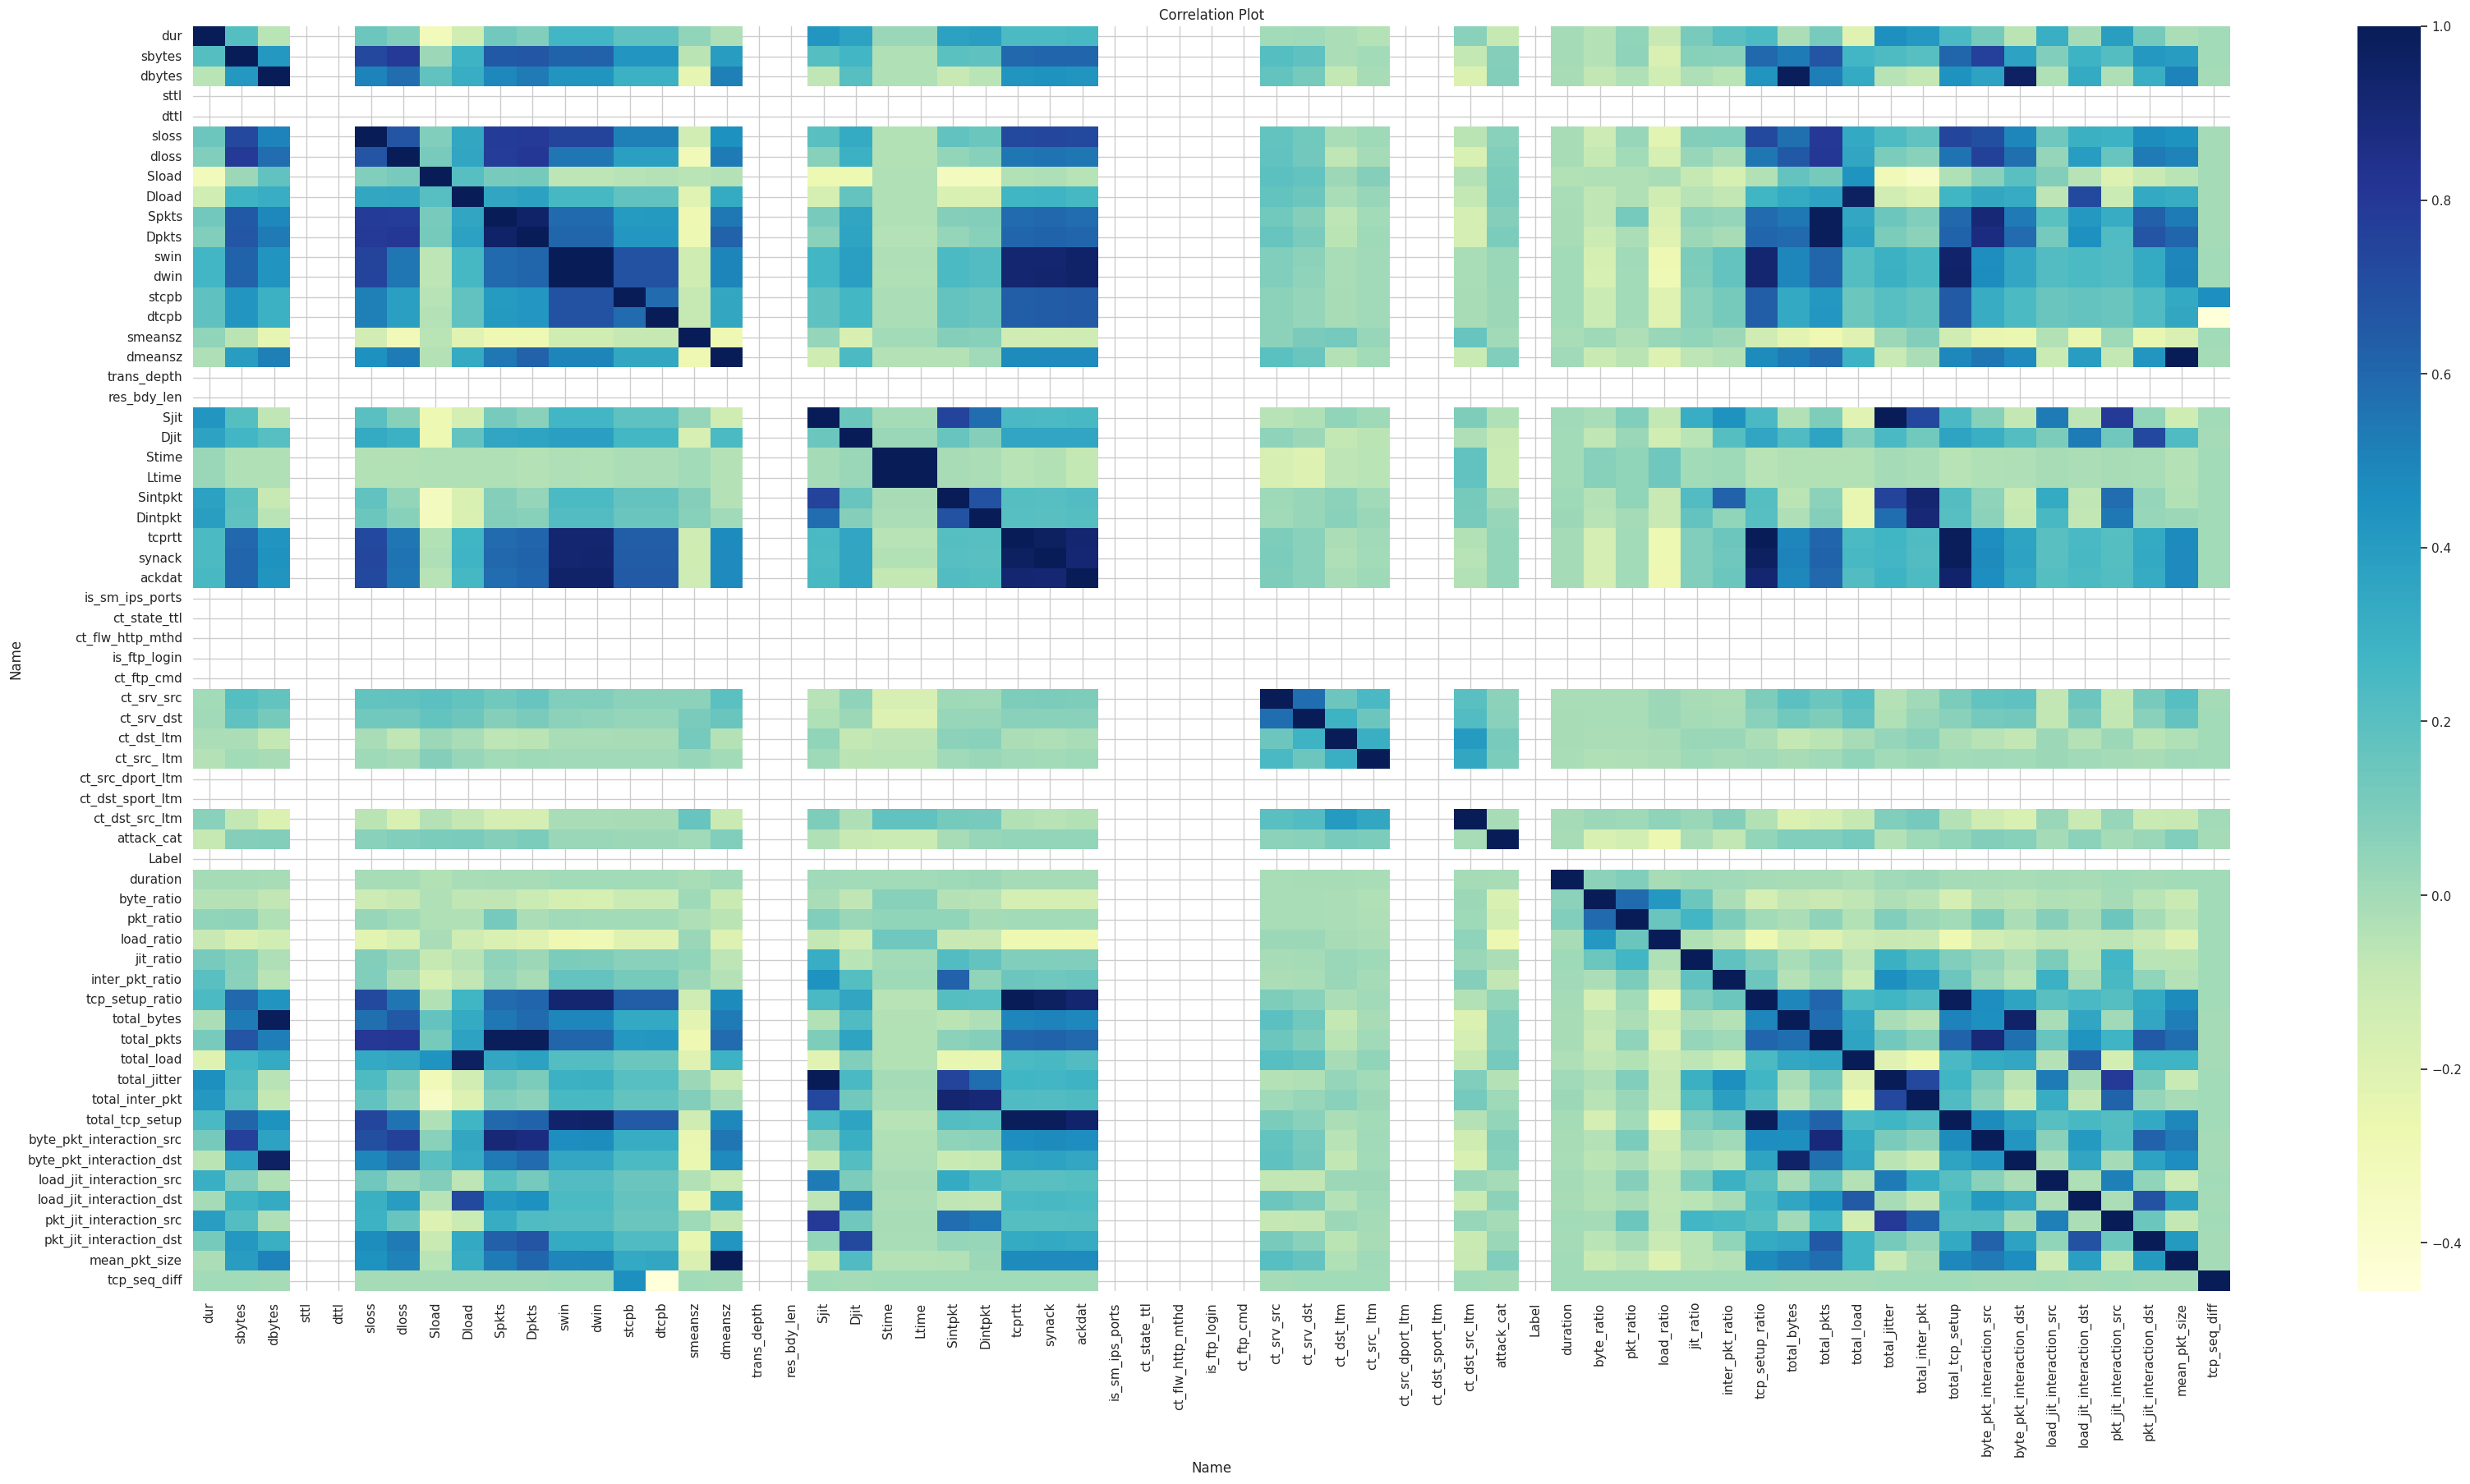

In [42]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),cmap='YlGnBu')

In [43]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:
sbytes and dloss
sbytes and byte_pkt_interaction_src
dbytes and total_bytes
dbytes and byte_pkt_interaction_dst
sloss and Spkts
sloss and Dpkts
sloss and total_pkts
dloss and Spkts
dloss and Dpkts
dloss and total_pkts
dloss and byte_pkt_interaction_src
Dload and total_load
Spkts and Dpkts
Spkts and total_pkts
Spkts and byte_pkt_interaction_src
Dpkts and total_pkts
Dpkts and byte_pkt_interaction_src
swin and dwin
swin and tcprtt
swin and synack
swin and ackdat
swin and tcp_setup_ratio
swin and total_tcp_setup
dwin and tcprtt
dwin and synack
dwin and ackdat
dwin and tcp_setup_ratio
dwin and total_tcp_setup
dmeansz and mean_pkt_size
Sjit and Sintpkt
Sjit and total_jitter
Sjit and pkt_jit_interaction_src
Stime and Ltime
Sintpkt and total_jitter
Sintpkt and total_inter_pkt
Dintpkt and total_inter_pkt
tcprtt and synack
tcprtt and ackdat
tcprtt and tcp_setup_ratio
tcprtt and total_tcp_setup
synack and ackdat
synack and tcp_setup_ratio
synack and total_tcp_setup
ack

In [44]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

# Drop the features from the DataFrame
train_df = train_df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(train_df.columns)

Remaining features after dropping highly correlated ones:
Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'Sload', 'Dload',
       'swin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
       'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Dintpkt', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label', 'duration', 'byte_ratio', 'pkt_ratio', 'load_ratio',
       'jit_ratio', 'inter_pkt_ratio', 'load_jit_interaction_src',
       'load_jit_interaction_dst', 'pkt_jit_interaction_dst', 'tcp_seq_diff'],
      dtype='object', name='Name')


In [45]:
x = train_df.drop(['attack_cat'], axis=1)
y = train_df[['attack_cat']]

Applying Smote to balance to unbalanced data

In [46]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Define the desired number of samples for each class
desired_count = 15000

# Define the oversampling strategy for SMOTE
oversample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] < desired_count}

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Print class distribution before resampling
print("Before resampling:", y.value_counts())
print()

# Apply the pipeline to resample the dataset
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print class distribution after resampling
print("After resampling:", y_resampled.value_counts())

Before resampling: attack_cat
7             1959771
4               27600
6               25378
5               21795
8               13357
3                5665
0                2185
1                1684
9                1511
2                 300
10                171
Name: count, dtype: int64

After resampling: attack_cat
0             15000
1             15000
2             15000
3             15000
4             15000
5             15000
6             15000
7             15000
8             15000
9             15000
10            15000
Name: count, dtype: int64


In [47]:
x = x_resampled
y = y_resampled

Feature importance

In [50]:
from sklearn.feature_selection import mutual_info_regression


In [48]:
discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df

In [51]:
mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)

mi_scores

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Features,Scores
0,byte_ratio,1.305345
1,sbytes,1.259332
2,smeansz,1.039983
3,load_ratio,0.768596
4,dbytes,0.743781
5,Stime,0.740144
6,dmeansz,0.718592
7,pkt_ratio,0.683797
8,inter_pkt_ratio,0.578150
9,ct_srv_dst,0.557988


In [52]:
# Filter features with scores less than 0.001285
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

# Print the list of low score feature names
low_score_feature_names

['ct_src_dport_ltm',
 'Label',
 'ct_ftp_cmd',
 'sttl',
 'is_ftp_login',
 'res_bdy_len',
 'dttl',
 'trans_depth',
 'ct_state_ttl',
 'is_sm_ips_ports',
 'ct_flw_http_mthd',
 'ct_dst_sport_ltm']

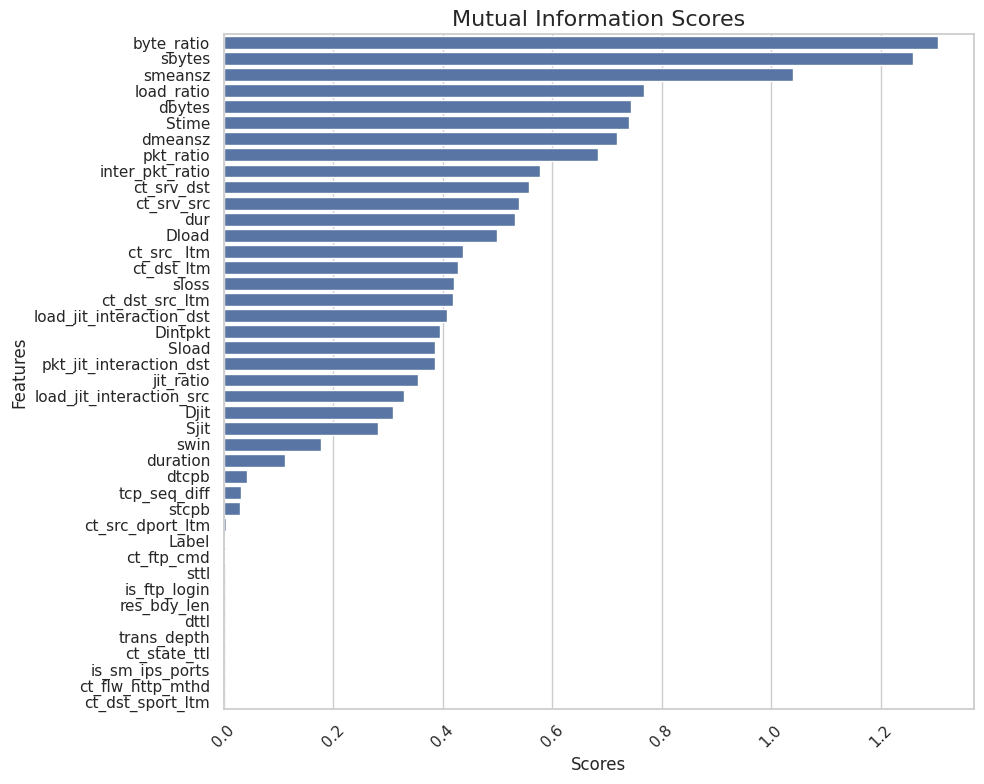

In [53]:
plt.figure(figsize=(10, 8))

# Create the barplot
sns.barplot(x='Scores', y='Features', data=mi_scores)

# Add a title
plt.title("Mutual Information Scores", fontsize=16)

# Rotate the y-axis labels (if needed)
plt.yticks(rotation=0)

# Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

In [54]:
x.drop(low_score_feature_names,axis=1, inplace = True)

Feature Scaling

In [55]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Dividing in train-test split

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Supervised ML

1-Random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Random Forest Classifier with predefined parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)

# Fit the Random Forest model to the scaled training data
rf_model.fit(x_train_scaled, y_train.to_numpy().ravel())

# Predict on the test data
rf_y_pred = rf_model.predict(x_test_scaled)

# Performance metrics for Random Forest without cross-validation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.53      0.54      2895
           1       0.56      0.68      0.61      2924
           2       0.88      0.97      0.92      3064
           3       0.63      0.48      0.54      3000
           4       0.77      0.76      0.76      3032
           5       0.87      0.87      0.87      2942
           6       0.94      0.86      0.90      3035
           7       1.00      0.98      0.99      3040
           8       0.84      0.79      0.82      3060
           9       0.89      0.96      0.93      3017
          10       0.98      1.00      0.99      2991

    accuracy                           0.81     33000
   macro avg       0.81      0.81      0.81     33000
weighted avg       0.81      0.81      0.81     33000

Random Forest Accuracy: 0.8093939393939394


2-KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier with default parameters
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Fit the KNN model to the scaled training data
knn_model.fit(x_train_scaled, y_train.to_numpy().ravel())

# Predict on the test data
knn_y_pred = knn_model.predict(x_test_scaled)

# Performance metrics for KNN without cross-validation
print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_y_pred))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.58      0.48      2895
           1       0.50      0.58      0.54      2924
           2       0.85      0.97      0.91      3064
           3       0.50      0.37      0.43      3000
           4       0.68      0.56      0.61      3032
           5       0.80      0.71      0.75      2942
           6       0.95      0.80      0.87      3035
           7       0.99      0.95      0.97      3040
           8       0.78      0.71      0.74      3060
           9       0.84      0.90      0.87      3017
          10       0.93      1.00      0.96      2991

    accuracy                           0.74     33000
   macro avg       0.75      0.74      0.74     33000
weighted avg       0.75      0.74      0.74     33000

KNN Accuracy: 0.739909090909091


Unsupervised ML modeling

K-means

In [62]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score

# Générer un ensemble de données synthétiques
n_samples = 1000
n_features = 5
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modèle de KMeans avec le nombre de clusters spécifié
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)

# Ajuster le modèle KMeans aux données d'entraînement mises à l'échelle
kmeans_model.fit(x_train_scaled)

# Prédire les étiquettes de cluster pour les données de test
kmeans_y_pred = kmeans_model.predict(x_test_scaled)

# Évaluation avec des étiquettes réelles (y) pour le rapport de classification
# Si vous n'avez pas d'étiquettes réelles, utilisez la génération d'étiquettes aléatoires
# y_test_fictif = np.random.randint(0, n_clusters, size=len(kmeans_y_pred))

# Évaluation de KMeans par rapport aux vraies étiquettes
print("KMeans Classification Report:")
print(classification_report(y_test, kmeans_y_pred))
print("KMeans Accuracy:", accuracy_score(y_test, kmeans_y_pred))

# Calculer le score de silhouette (optionnel)
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(x_test_scaled, kmeans_y_pred)
print("KMeans Silhouette Score:", silhouette_avg)


KMeans Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.00      0.00      0.00        75
           2       1.00      1.00      1.00        56

    accuracy                           0.28       200
   macro avg       0.33      0.33      0.33       200
weighted avg       0.28      0.28      0.28       200

KMeans Accuracy: 0.28
KMeans Silhouette Score: 0.7035178937229363


DBSCAN

In [63]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, accuracy_score

# Générer un ensemble de données synthétiques
n_samples = 1000
n_features = 5
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modèle DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# Ajuster le modèle DBSCAN aux données d'entraînement mises à l'échelle
dbscan_model.fit(x_train_scaled)

# Prédire les étiquettes de cluster pour les données de test
dbscan_y_pred = dbscan_model.fit_predict(x_test_scaled)

# Pour DBSCAN, les labels sont souvent -1 pour le bruit et les autres pour les clusters
# Créer des étiquettes réelles fictives pour la comparaison (si y_test est connu)
# Note: Vous pouvez utiliser les vraies étiquettes si disponibles
y_test_fictif = np.random.randint(0, n_clusters, size=len(dbscan_y_pred))

# Calculer la précision et le rapport de classification
print("DBSCAN Classification Report:")
print(classification_report(y_test_fictif, dbscan_y_pred))
print("DBSCAN Accuracy:", accuracy_score(y_test_fictif, dbscan_y_pred))

# Calculer le score de silhouette (optionnel)
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(x_test_scaled, dbscan_y_pred)
print("DBSCAN Silhouette Score:", silhouette_avg)


DBSCAN Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.33      0.34      0.34        68
           1       0.27      0.25      0.26        65
           2       0.35      0.21      0.26        67

    accuracy                           0.27       200
   macro avg       0.24      0.20      0.21       200
weighted avg       0.32      0.27      0.29       200

DBSCAN Accuracy: 0.265
DBSCAN Silhouette Score: 0.4961150579161504


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
